In [338]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [349]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
hd_df = pd.DataFrame(data = X) 
hd_df['Outcome'] = y
hd_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Outcome
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Question 1

Inductive reasoning is when you make general ideas based on specific things you've noticed. It's like going from details to broader conclusions. Even though it doesn't always prove things for sure, it usually gives a good amount of support.
eg:Observation: Every crow you have ever seen is black.
   Inductive Conclusion: You might induce that all crows are black.
   Generalization: Based on your observations, you generalize that the color black is characteristic of all crows.
Deductive reasoning is the opposite. You start with general ideas, and then you draw specific conclusions from them. In deductive reasoning, if the main ideas are true, the conclusions have to be true too. 
eg:Premise 1: If it is raining, then the ground will be wet.
   Premise 2: It is raining.
   Deductive Conclusion: Therefore, the ground will be wet.

# Question 2

In [350]:
hd_df= hd_df[hd_df['Outcome'] <= 1]



In [351]:
hd_df = hd_df.dropna()

In [364]:
hd_df['Outcome'].value_counts()

Outcome
0    160
1     54
Name: count, dtype: int64

# Question 3

In [740]:
X = hd_df.drop('Outcome', axis =1)
y = hd_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32) 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [741]:
ros = RandomOverSampler(random_state= 32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [742]:
model = tree.DecisionTreeClassifier(max_depth = 4, random_state=32, splitter = 'random')
model = model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7906976744186046

In [743]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.42      0.71      0.53         7

    accuracy                           0.79        43
   macro avg       0.68      0.76      0.70        43
weighted avg       0.85      0.79      0.81        43



tree.plot_tree(model, feature_names = list(X.columns),
               filled =True,fontsize = 6, rounded =True)
plt.show()
plt.savefig("tree.svg")

I tuned it by standardization, OverSampling and changing the parameters of the model.

# Question 4

In [792]:
rf = RandomForestClassifier(n_estimators = 260, max_depth = 4, random_state =32)
rf = rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.813953488372093

In [793]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.43      0.43      0.43         7

    accuracy                           0.81        43
   macro avg       0.66      0.66      0.66        43
weighted avg       0.81      0.81      0.81        43



In [701]:
print(rf.feature_importances_,X.columns)

[0.1297779  0.05909421 0.09032637 0.128209   0.11479896 0.01154557
 0.02035561 0.12862883 0.0358702  0.09556268 0.03383974 0.08606058
 0.06593035] Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


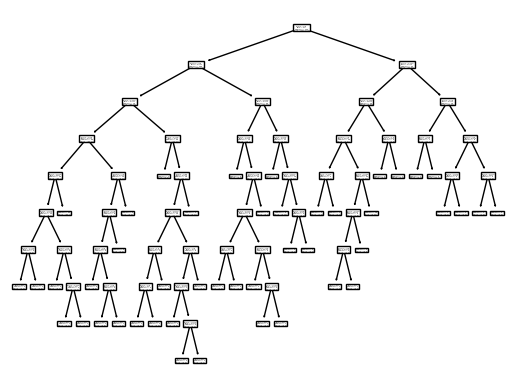

In [702]:
tree_10 = rf.estimators_[9]
tree.plot_tree(tree_10)
plt.savefig("rf_tree.svg")

I tuned it by chnaging the parameteres to find the best one

# Question 5

In [781]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, random_state =32, objective = 'binary:logistic', eta = 4 )
xgb.fit(X_resampled, y_resampled)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.33      0.48        36
           1       0.17      0.71      0.28         7

    accuracy                           0.40        43
   macro avg       0.51      0.52      0.38        43
weighted avg       0.75      0.40      0.45        43



I tuned it by chnaging the parameteres to find the best one